In [6]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
root: Path = Path.cwd().parent
run_dir: Path = root / "data" / "21:08_oct_07_2025_5min"

ori_path = run_dir / "Orientation.csv"

if not ori_path:
        raise FileNotFoundError(f"File not found: {ori_path}")

In [8]:
ori_cols: list[str] = ["seconds_elapsed", "qw", "qx", "qy", "qz"]

ori: pd.DataFrame = pd.read_csv(ori_path, usecols=ori_cols)
ori[ori_cols] = ori[ori_cols].apply(pd.to_numeric, errors="coerce")
ori = ori.dropna(subset=ori_cols).sort_values("seconds_elapsed").reset_index(drop=True)
ori = ori[ori_cols]

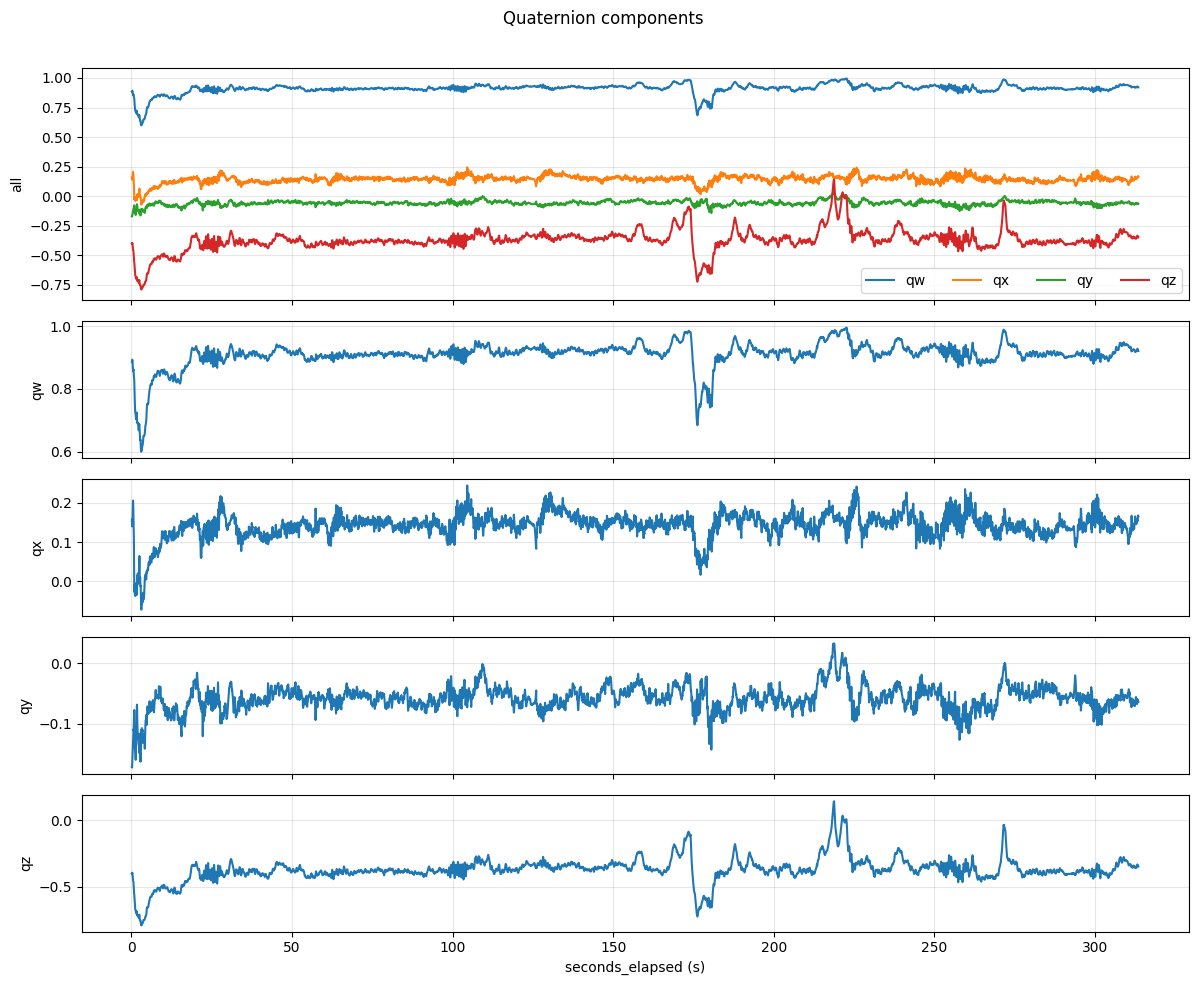

In [9]:
components = ["qw", "qx", "qy", "qz"]

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(12,10),
                        gridspec_kw={"height_ratios": [1.7, 1, 1, 1, 1]})
fig.suptitle("Quaternion components")

for c in components:
        axs[0].plot(ori["seconds_elapsed"], ori[c], label=c)
axs[0].set_ylabel("all")
axs[0].grid(True, alpha=0.3)
axs[0].legend(loc="lower right", ncol=4)

for i, c in enumerate(components, start=1):
        axs[i].plot(ori["seconds_elapsed"], ori[c], label=c)
        axs[i].set_ylabel(c)
        axs[i].grid(True, alpha=0.3)

axs[-1].set_xlabel("seconds_elapsed (s)")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

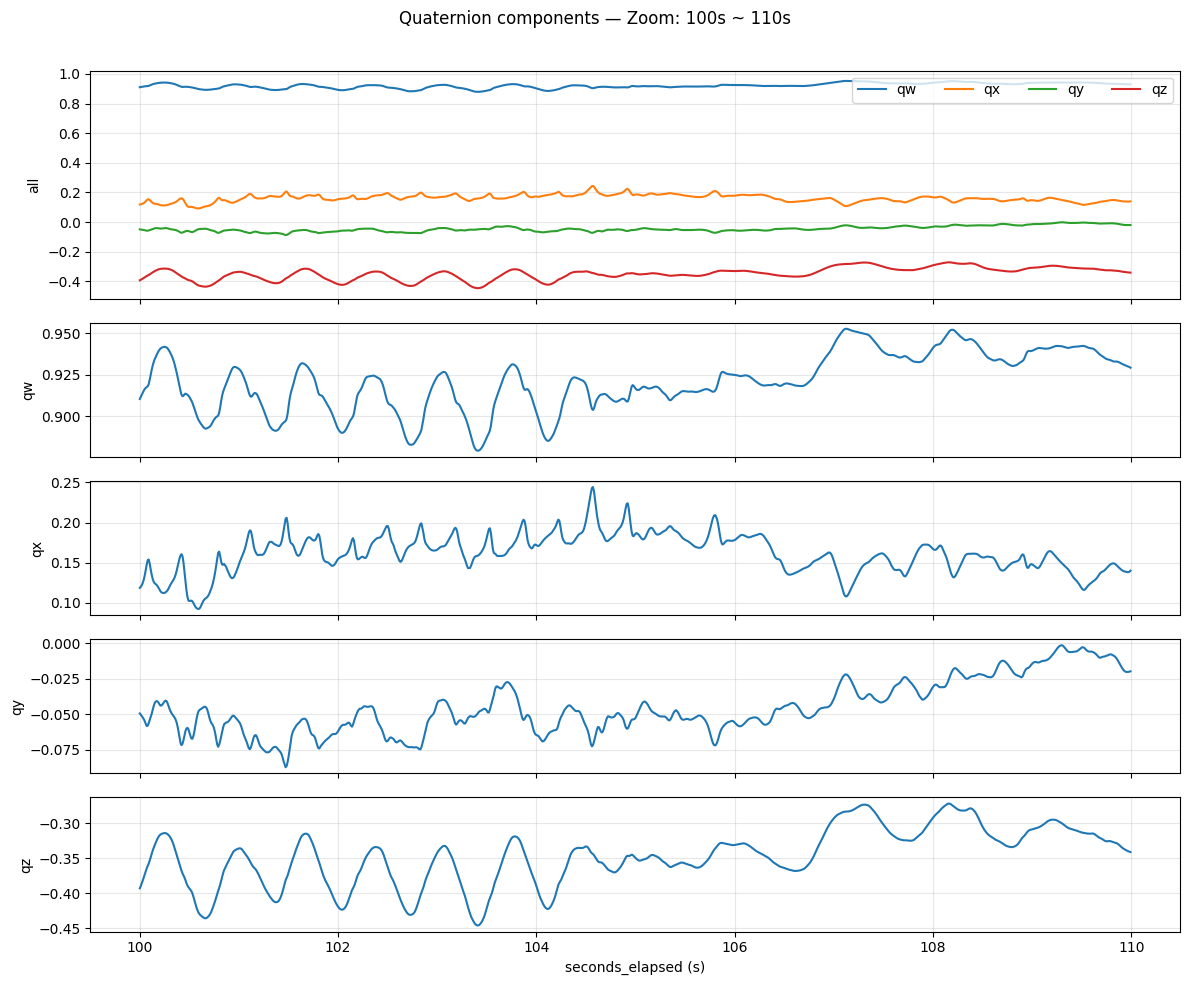

In [10]:
t0, t1 = 100, 110
mask = ori["seconds_elapsed"].between(t0, t1)

if not mask.any():
        print(f"No data in range: {t0}s ~ {t1}s")
else:
        x = ori.loc[mask, "seconds_elapsed"]
        components = ["qw", "qx", "qy", "qz"]

        fig, axs = plt.subplots(5, 1, sharex=True, figsize=(12,10),
                                gridspec_kw={"height_ratios": [1.7, 1, 1, 1, 1]})
        fig.suptitle(f"Quaternion components — Zoom: {t0}s ~ {t1}s")

        for c in components:
                axs[0].plot(x, ori.loc[mask, c], label=c)
        axs[0].set_ylabel("all")
        axs[0].grid(True, alpha=0.3)
        axs[0].legend(loc="upper right", ncol=4)

        for i, c in enumerate(components, start=1):
                axs[i].plot(x, ori.loc[mask, c], label=c)
                axs[i].set_ylabel(c)
                axs[i].grid(True, alpha=0.3)

        axs[-1].set_xlabel("seconds_elapsed (s)")
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()
